# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [1]:
import pandas as pd

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [2]:
# Reading in the data
temp1 = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv")
temp2 = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv")

# Getting a preliminary look at it
# temp1.head()
temp2.head()

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,ACW00011604,2011,-83.0,-132.0,278.0,1040.0,1213.0,1663.0,1875.0,1723.0,1466.0,987.0,721.0,428.0
1,ACW00011604,2012,121.0,-98.0,592.0,646.0,1365.0,1426.0,1771.0,1748.0,1362.0,826.0,620.0,-234.0
2,ACW00011604,2013,-104.0,-93.0,-48.0,595.0,NaN,1612.0,1855.0,1802.0,1359.0,1042.0,601.0,NaN
3,AE000041196,2011,1950.0,2060.0,2280.0,2760.0,3240.0,3447.0,3580.0,3650.0,3316.0,2940.0,2390.0,1905.0
4,AE000041196,2012,1837.0,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at both data sets briefly, we can see that they have matching column names, thus we will combine them
by row.

In [3]:
# Comibining into a large dataframe
# Adding `ignore_index=True` to reset index values
temp_data = pd.concat([temp1, temp2], ignore_index=True)

# Looking at the data 
temp_data.head()

# # Checking dimensions
# len(temp_data) == len(temp1) + len(temp2)

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [4]:
# Reading the data and investigating the first few rows
fips = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv")
fips.head()

# Data contains:
## Country name 
## FIPS 10-4 (will be used to match with first 2 characters of ID string)

,FIPS 10-4,ISO 3166,Name
0,AF,AF,Afghanistan
1,AX,-,Akrotiri
2,AL,AL,Albania
3,AG,DZ,Algeria
4,AQ,AS,American Samoa


In [5]:
# Reading the data and investigating the first few rows
station_metadata = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv")
station_metadata.head()

# Data contains:
## ID (we will use as key for joining)
## Latitude 
## Longitude
## Name (of station)

,ID,LATITUDE,LONGITUDE,STNELEV,NAME
0,ACW00011604,57.7667,11.8667,18.0,SAVE
1,AE000041196,25.3330,55.5170,34.0,SHARJAH_INTER_AIRP
2,AEM00041184,25.6170,55.9330,31.0,RAS_AL_KHAIMAH_INTE
3,AEM00041194,25.2550,55.3640,10.4,DUBAI_INTL
4,AEM00041216,24.4300,54.4700,3.0,ABU_DHABI_BATEEN_AIR


In [6]:
# Looking back at the columns in the temperature data
temp_data.head()

# Data contains:
## ID (we will use as key for joining)
## Year
## Temperatures Jan - Dec (The measurements are in hundredths of a degree, Celsius >> to report degree, need to divide by 100)

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0


### Joining the Data

In [7]:
# Extracting country abbrev. with the str attribute
# by creating a new column whose name matches exactly 
# the corresponding column in the countries data frame
temp_data["FIPS 10-4"] = temp_data["ID"].str[0:2]
temp_data.head()

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,FIPS 10-4
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0,AG
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0,AG
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0,AG
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0,AG
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0,AG


In [8]:
# Next, merging the fips data with the temp_data
temp_data = pd.merge(temp_data, fips, on = ["FIPS 10-4"])
temp_data.head()

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,FIPS 10-4,ISO 3166,Name
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0,AG,DZ,Algeria
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0,AG,DZ,Algeria
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0,AG,DZ,Algeria
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0,AG,DZ,Algeria
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0,AG,DZ,Algeria


After the first merge, we can see that we now have country name included in the temp_data.

Next, we will merge the new `temp_data` with `station_metadata` on the `ID` column to get latitude and longitude information into the data.

In [9]:
# Merging the station_metadata data with the temp_data
temp_data = pd.merge(temp_data, station_metadata, on = ["ID"])
temp_data.head()

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,...,VALUE10,VALUE11,VALUE12,FIPS 10-4,ISO 3166,Name,LATITUDE,LONGITUDE,STNELEV,NAME
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,...,1604.0,1364.0,1004.0,AG,DZ,Algeria,36.7167,3.25,24.0,ALGER_DAR_EL_BEIDA
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,...,1694.0,1494.0,1134.0,AG,DZ,Algeria,36.7167,3.25,24.0,ALGER_DAR_EL_BEIDA
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,...,1926.0,1356.0,1056.0,AG,DZ,Algeria,36.7167,3.25,24.0,ALGER_DAR_EL_BEIDA
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,...,1826.0,1376.0,1246.0,AG,DZ,Algeria,36.7167,3.25,24.0,ALGER_DAR_EL_BEIDA
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,...,1716.0,1386.0,1076.0,AG,DZ,Algeria,36.7167,3.25,24.0,ALGER_DAR_EL_BEIDA


#### Refining the Data

Now that all possible necessary columns are in the joined `temp_data`, we will filter to select strictly necessary columns which include:

- **ID** number of the station
- **year** of the measurement
- **temperature** measurements (Jan - Dec in degrees C)
- **country name**
- **Lattitude**
- **Longitude**
- **station name** (NAME column in station_metadata.csv)

In [10]:
temp_data = temp_data[["ID", "Year", "VALUE1", "VALUE2", "VALUE3", "VALUE4", "VALUE5", "VALUE6",
                      "VALUE7", "VALUE8", "VALUE9", "VALUE10", "VALUE11", "VALUE12", "Name", 
                       "LATITUDE", "LONGITUDE", "NAME"]]

# Renaming cols for clarity
temp_data = temp_data.rename(columns={"Name": "Country"})
temp_data.head()

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,Country,LATITUDE,LONGITUDE,NAME
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0,Algeria,36.7167,3.25,ALGER_DAR_EL_BEIDA
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0,Algeria,36.7167,3.25,ALGER_DAR_EL_BEIDA
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0,Algeria,36.7167,3.25,ALGER_DAR_EL_BEIDA
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0,Algeria,36.7167,3.25,ALGER_DAR_EL_BEIDA
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0,Algeria,36.7167,3.25,ALGER_DAR_EL_BEIDA


Finally, we will divide the `VALUE1` - `VALUE12` temperature columns by 100 to report the temperatures in degrees Celsius.

In [11]:
temp_data['VALUE1'] = temp_data['VALUE1'].div(100)
temp_data['VALUE2'] = temp_data['VALUE2'].div(100)
temp_data['VALUE3'] = temp_data['VALUE3'].div(100)
temp_data['VALUE4'] = temp_data['VALUE4'].div(100)
temp_data['VALUE5'] = temp_data['VALUE5'].div(100)
temp_data['VALUE6'] = temp_data['VALUE6'].div(100)
temp_data['VALUE7'] = temp_data['VALUE7'].div(100)
temp_data['VALUE8'] = temp_data['VALUE8'].div(100)
temp_data['VALUE9'] = temp_data['VALUE9'].div(100)
temp_data['VALUE10'] = temp_data['VALUE10'].div(100)
temp_data['VALUE11'] = temp_data['VALUE11'].div(100)
temp_data['VALUE12'] = temp_data['VALUE12'].div(100)

#### Finally, the merged and cleaned `temp_data`:

In [12]:
temp_data.head()

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,Country,LATITUDE,LONGITUDE,NAME
0,AG000060390,1901,10.34,8.44,11.64,15.34,15.64,23.54,24.44,23.64,22.14,16.04,13.64,10.04,Algeria,36.7167,3.25,ALGER_DAR_EL_BEIDA
1,AG000060390,1902,9.84,11.94,12.54,15.44,15.14,19.84,24.84,25.74,21.64,16.94,14.94,11.34,Algeria,36.7167,3.25,ALGER_DAR_EL_BEIDA
2,AG000060390,1903,11.44,10.64,12.66,13.46,16.46,19.06,23.26,24.46,21.46,19.26,13.56,10.56,Algeria,36.7167,3.25,ALGER_DAR_EL_BEIDA
3,AG000060390,1904,9.26,11.26,11.36,14.06,18.36,21.26,25.16,26.06,20.76,18.26,13.76,12.46,Algeria,36.7167,3.25,ALGER_DAR_EL_BEIDA
4,AG000060390,1905,9.06,8.66,13.86,15.76,15.96,21.46,23.26,24.96,22.06,17.16,13.86,10.76,Algeria,36.7167,3.25,ALGER_DAR_EL_BEIDA


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [13]:
def query_climate(df, country, year_begin, year_end, month):
    """
    Query a given data frame using the given arguments.
    
    Args:
        df: the file name for the dataframe
        country: a string giving the name of a country for which data should be returned.
        year_begin: integer giving the earliest year to return.
        year_end: integer giving the latest year to return.
        month: integer giving the month of the year for which should be returned.
    ...
    
    Output: 
        Return a Pandas dataframe of temperature readings for the specified country, 
        in the specified date range, in the specified month of the year. Columns of 
        the returned dataframe are as follows:
            NAME: The station name.
            LATITUDE: The latitude of the station.
            LONGITUDE: The longitude of the station.
            Country: The name of the country in which the station is located.
            Year: The year in which the reading was taken.
            Month: The month in which the reading was taken.
            Temp: The temperature at the specified station during the specified year and month.
    """
    # Assuming the input data has temperatures in the form VALUE1-VALUE12
    # Transforming wide temp values into long form by making month and temperature cols
    
    # Converting cols we don't want to stack
    df = df.set_index(keys = ['ID', 'Year', 'Country', 'LATITUDE', 'LONGITUDE', 'NAME'])
    
    # Stacking the data values
    df = df.stack()
    
    # Recovering cols we didn't want to stack
    # such that month info stored in `level_6` col and 
    # temp info stored in `0` col
    df = df.reset_index()
    
    # Renaming the new columns
    df = df.rename(columns = {"level_6": "Month", 0:"Temp"})
    
    # Manipulating `Month` to numerically indicate month of the year
    df["Month"] = df["Month"].str[5:].astype(int)
    
    # Selecting necessary cols and reordering
    df = df[["NAME", "LATITUDE", "LONGITUDE", "Country", "Year", "Month", "Temp"]]
    
    ## FILTERING BASED ON PROVIDED ARGS ##
    # Country
    df = df[df["Country"] == country]
    
    # Filtering by year_begin - year_end
    df = df[(df["Year"] >= year_begin) & (df["Year"] <= year_end)]
    
    # Filtering by month
    df = df[df["Month"] == month]
    
    # Returning the queried df
    return df

Run this example and check if you get the correct result, your obtained dataframe looks like:

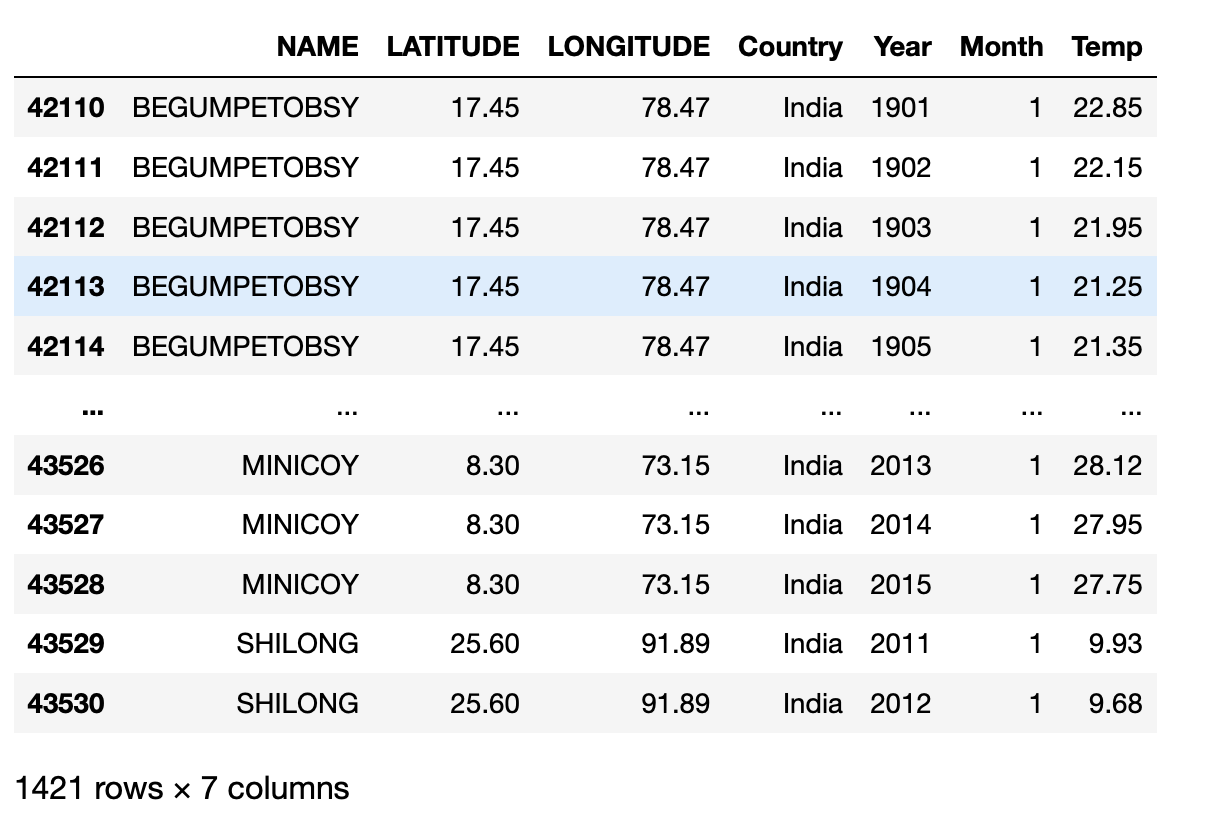

In [14]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = temp_data, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
442659,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
442671,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
442683,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
442695,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
442707,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
458426,MINICOY,8.30,73.15,India,2013,1,28.12
458438,MINICOY,8.30,73.15,India,2014,1,27.95
458450,MINICOY,8.30,73.15,India,2015,1,27.75
458454,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

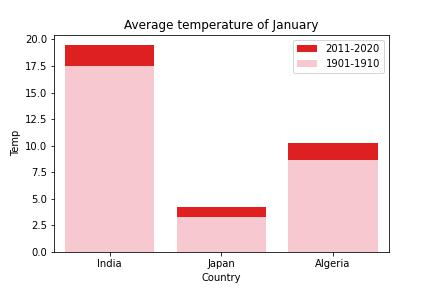

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

#### Selecting interests for my plots

- Countries of interest: `["Belgium", "France", "Germany", "Netherlands"]`
- Months of interest: `[1, 2, 3, 4, 5, 6]`
- Decade ranges: `"1901-1910"` and `"2011-2020"`

#### Writing function to query temperature averages from a specific country

In [16]:
def query_country(df, country, months, year_begin1, year_end1, year_begin2, year_end2):
    """
    Query temperature averages from a country a given data frame & using the given arguments.
    
    Args:
        df: the file name for the dataframe
        country: a string giving the name of a country for which data should be returned.
        months: list of integers giving the months of the year for which the avg temps should be computed.
        year_begin1: integer giving the earliest year to return in the first decade.
        year_end1: integer giving the latest year to return in the first decade.
        year_begin2: integer giving the earliest year to return in the second decade.
        year_end2: integer giving the latest year to return in the second decade.
    ...
    
    Output: 
        Return a Pandas dataframe of two average temperatures (one for each decade interval) for the country 
        in each of the months provided. Columns of the returned dataframe are as follows:
            Country: The name of the country of interest.
            Decade Interval: The decades in which the average temp was computed.
            Month: The month in which the avg temp was computed.
            Avg Temp: The avg temperature in the country during the specified decade interval and month.
    """
    # Using the query_climate() function written in pt 3 in this function
    
    # Allocating space for a data frame to append averages to
    country_df = pd.DataFrame([])
    
    # Creating decade interval strings based on given arguments
    decade_interval1 = str(year_begin1) +"-"+ str(year_end1)
    decade_interval2 = str(year_begin2) +"-"+ str(year_end2)

    # Computing averages for the FIRST decade interval
    for i in months:
        # Getting temps for specific month/country
        df_i = query_climate(df = df, country = country, year_begin = year_begin1, 
                             year_end = year_end1, month = i)

        # Isolating cols to compute avg temp for given month and country
        df_i = df_i.groupby(['Country', 'Month'])[["Temp"]].mean()

        # Reverting back to regular cols for plotting reasons
        df_i = df_i.reset_index()

        # Adding decade interval as column
        df_i["Decade Interval"] = decade_interval1

        # Appending month avg to overall data set to return
        country_df = pd.concat([country_df, df_i], ignore_index=True)

    # Computing averages for the SECOND decade interval
    for i in months:
        # Getting temps for specific month/country
        df_i = query_climate(df = df, country = country, year_begin = year_begin2, 
                             year_end = year_end2, month = i)

        # Isolating cols to compute avg temp for given month and country
        df_i = df_i.groupby(['Country', 'Month'])[["Temp"]].mean()

        # Reverting back to regular cols for plotting reasons
        df_i = df_i.reset_index()

        # Adding decade interval as column
        df_i["Decade Interval"] = decade_interval2

        # Appending month avg to overall data set to return
        country_df = pd.concat([country_df, df_i], ignore_index=True)

    # Renaming the temp col to accurately reflect that it is an average
    country_df = country_df.rename(columns={"Temp": "Average Temp"})
    
    # Returning final df with avgs for both decades and all months
    return country_df

#### Using the above defined function to compute the average data frames

From the above data frame, we can see that the for each decade interval and the desired months, the average temperature was computed for Belgium. We will repeat this for the other 3 countries of interest.

In [17]:
# Belgium
belgium_avgs = query_country(df = temp_data, country = "Belgium", months = [1, 2, 3, 4, 5, 6], 
                             year_begin1 = 1901, year_end1 = 1910, 
                             year_begin2 = 2011, year_end2 = 2020)

# France
france_avgs = query_country(df = temp_data, country = "France", months = [1, 2, 3, 4, 5, 6], 
                             year_begin1 = 1901, year_end1 = 1910, 
                             year_begin2 = 2011, year_end2 = 2020)

# Germany
germany_avgs = query_country(df = temp_data, country = "Germany", months = [1, 2, 3, 4, 5, 6], 
                             year_begin1 = 1901, year_end1 = 1910, 
                             year_begin2 = 2011, year_end2 = 2020)

# Netherlands
netherlands_avgs = query_country(df = temp_data, country = "Netherlands", months = [1, 2, 3, 4, 5, 6], 
                             year_begin1 = 1901, year_end1 = 1910, 
                             year_begin2 = 2011, year_end2 = 2020)

In [18]:
# Making a dataframe with all of the average temps for each country
all_countries_df = pd.DataFrame([])
all_countries_df = pd.concat([all_countries_df, belgium_avgs, france_avgs, germany_avgs, netherlands_avgs], 
                          ignore_index=True)
all_countries_df

,Country,Month,Average Temp,Decade Interval
0,Belgium,1,2.161000,1901-1910
1,Belgium,2,2.443000,1901-1910
2,Belgium,3,5.478000,1901-1910
3,Belgium,4,8.604000,1901-1910
4,Belgium,5,12.893000,1901-1910
5,Belgium,6,15.761000,1901-1910
6,Belgium,1,3.742097,2011-2020
7,Belgium,2,2.433077,2011-2020
8,Belgium,3,6.091111,2011-2020
9,Belgium,4,9.961321,2011-2020


In [19]:
# Making individual dfs for each month
jan_df = pd.DataFrame({'1901-1910': [2.161000, 4.189538, -0.925045, 1.376061], 
                      '2011-2020': [3.742097, 5.941191, 1.155610, 4.220940]}, 
                      index = ['Belgium', 'France', 'Germany', 'Netherlands'])

feb_df = pd.DataFrame({'1901-1910': [2.443000, 4.672462, -0.215015, 2.060909], 
                      '2011-2020': [2.433077, 5.727709, 0.811697, 3.794034]}, 
                      index = ['Belgium', 'France', 'Germany', 'Netherlands'])

mar_df = pd.DataFrame({'1901-1910': [5.478000, 7.585538, 2.906213, 3.988235], 
                      '2011-2020': [6.091111, 8.869307, 4.654118, 5.976229]}, 
                      index = ['Belgium', 'France', 'Germany', 'Netherlands'])

apr_df = pd.DataFrame({'1901-1910': [8.604000, 10.760308, 6.573428, 7.234706], 
                      '2011-2020': [9.961321, 11.808633, 9.193401, 9.291775]}, 
                      index = ['Belgium', 'France', 'Germany', 'Netherlands'])

may_df = pd.DataFrame({'1901-1910': [12.893000, 14.367846, 11.561674, 11.869706], 
                      '2011-2020': [13.054906, 14.632570, 12.857827, 12.402027]}, 
                      index = ['Belgium', 'France', 'Germany', 'Netherlands'])

jun_df = pd.DataFrame({'1901-1910': [15.761000, 17.636769, 15.030358, 14.505588], 
                      '2011-2020': [15.665472, 18.156271, 16.306757, 15.210798]}, 
                      index = ['Belgium', 'France', 'Germany', 'Netherlands'])

#### Visualizing the Averages

Since we want 6 different plots (included in a single plot using subplot command), we will visualize each month of avg temps per decade as a barplot (like the one provided) with each of the 4 countries on the x axis.

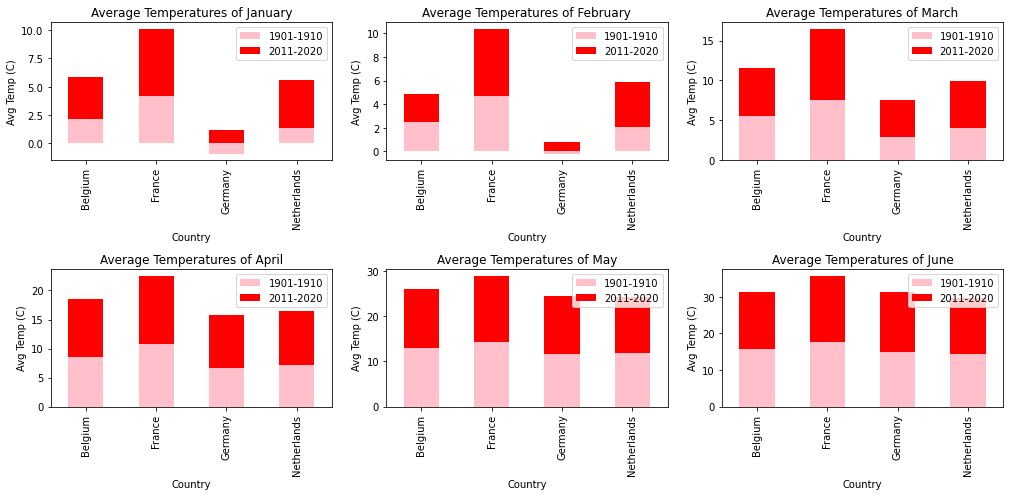

In [20]:
# Creating the 6 plots
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

# plotting stacked bar charts
jan_df.plot.bar(stacked=True, ax = ax, color = ["pink", "red"])
feb_df.plot.bar(stacked=True, ax = ax2, color = ["pink", "red"])
mar_df.plot.bar(stacked=True, ax = ax3, color = ["pink", "red"])
apr_df.plot.bar(stacked=True, ax = ax4, color = ["pink", "red"])
may_df.plot.bar(stacked=True, ax = ax5, color = ["pink", "red"])
jun_df.plot.bar(stacked=True, ax = ax6, color = ["pink", "red"])

# Setting subplot titles 
ax.set_title("Average Temperatures of January")
ax2.set_title("Average Temperatures of February")
ax3.set_title("Average Temperatures of March")
ax4.set_title("Average Temperatures of April")
ax5.set_title("Average Temperatures of May")
ax6.set_title("Average Temperatures of June")

# Setting axes titles
ax.set_xlabel('Country')
ax.set_ylabel('Avg Temp (C)')
ax2.set_xlabel('Country')
ax2.set_ylabel('Avg Temp (C)')
ax3.set_xlabel('Country')
ax3.set_ylabel('Avg Temp (C)')
ax4.set_xlabel('Country')
ax4.set_ylabel('Avg Temp (C)')
ax5.set_xlabel('Country')
ax5.set_ylabel('Avg Temp (C)')
ax6.set_xlabel('Country')
ax6.set_ylabel('Avg Temp (C)')

fig.tight_layout()

From the plots of temperature averages for January - June for each country in each decade, we can conclude that across decades and months, Germany tends to have lower average temperatures compared to the other countries while France tends to have higher average temperatures than the other countries.

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use **seaborn**.

**Grading is based on the plots and your description. Your explanation should match your plot.**

In [21]:
## Data that I will be using for this problem (from pt 4)
all_countries_df.head()

,Country,Month,Average Temp,Decade Interval
0,Belgium,1,2.161,1901-1910
1,Belgium,2,2.443,1901-1910
2,Belgium,3,5.478,1901-1910
3,Belgium,4,8.604,1901-1910
4,Belgium,5,12.893,1901-1910


#### Plot 1: Swarm Plot

Text(0.5, 0.98, 'Swarm Plot of Average Temperature \nPer Country for Both Decade Intervals')

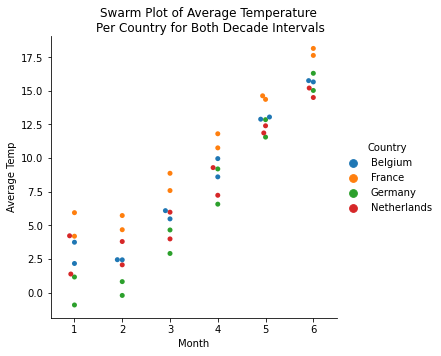

In [22]:
plot1 = sns.catplot(data=all_countries_df, kind="swarm", x="Month", y="Average Temp", hue="Country")
plot1.fig.subplots_adjust(top=0.9)
plot1.fig.suptitle("Swarm Plot of Average Temperature \nPer Country for Both Decade Intervals")

From the above swarm plot, we can see the individual average temperatures for each decade interval by month for each country. We conclude that there is a positive linear trend, per decade interval, in the average temperature from January to June for each country. 

#### Plot 2: Line Plot

Text(0.5, 0.98, 'Line Plot of Average Temperature \nAcross Months Per Country')

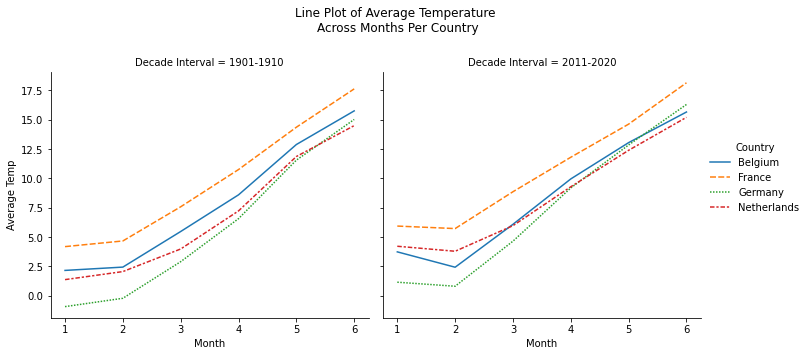

In [23]:
plot2 = sns.relplot(data = all_countries_df, 
                    kind = "line", x = "Month", y = "Average Temp", col = "Decade Interval",
                    hue = "Country", style = "Country")
plot2.fig.subplots_adjust(top=0.8)
plot2.fig.suptitle("Line Plot of Average Temperature \nAcross Months Per Country")

From the above plot, we conclude that regardless of decade, France consistently has the highest average temperature across all months (January - June). In the decade 1901-1910: the average temperatures in Belgium tends to be second highest, followed by the Netherlands and then France. This trend is fairly consistent across months in the earlier decade, yet when the decade shifts to 2011-2020: we see much more interaction between the average temperatures for France, Germany, and the Netherlands. They have more distinct differences in average temperature in the earlier months (January - March), but as the months continue, the average temperatures tend to be much closer. 

#### Plot 3: Side-by-Side Bar Plot

Text(0.5, 0.98, 'Bar Plot of Average Temperature \nPer Country by Decade')

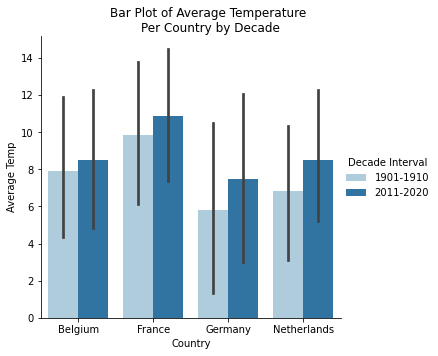

In [24]:
plot3 = sns.catplot(data = all_countries_df, kind="bar", 
            x="Country", y="Average Temp", hue="Decade Interval", 
           palette=sns.color_palette("Paired"))
plot3.fig.subplots_adjust(top=0.9)
plot3.fig.suptitle("Bar Plot of Average Temperature \nPer Country by Decade")

From the above plot, we conclude that with an incremental shift in decade intervals (from 1901-1910 to 2011-2020), the average temperature in degrees C tends to significantly increase for each country.

#### Plot 4: Distribution Plot

Text(0.5, 0.98, 'Distribution Plot of Average Temperature \nPer Month Across all Countries')

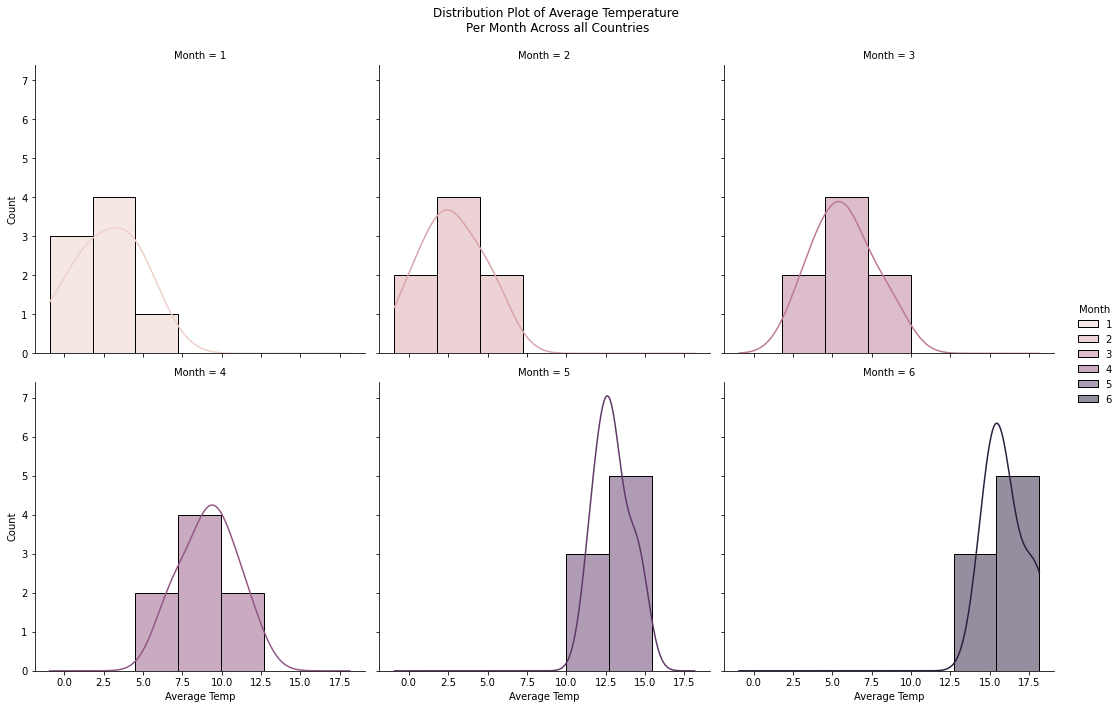

In [25]:
plot4 = sns.displot(data=all_countries_df, x="Average Temp", col="Month", kde=True, 
                    col_wrap = 3, hue = "Month")
plot4.fig.subplots_adjust(top=0.9)
plot4.fig.suptitle("Distribution Plot of Average Temperature \nPer Month Across all Countries")

From the above plot, we conclude that with the progression of months (January - June) across all countries and decade groups, there tends to be a positive shift (greater) average temperature in later months than earlier ones.

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell

https://github.com/0liviaWeisiger/HW